# Introduction to Time Series

## Autoregression

In a multiple regression model, we forecast the variable of interest using a linear combination of predictors. In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable. The term autoregression indicates that it is a regression of the variable against itself.

Thus, an autoregressive model of order $p$ can be written as

$$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t},$$

where $\varepsilon_t$ is white noise. This is like a multiple regression but with lagged values of $y_t$ as predictors. We refer to this as an AR($p$) model, an autoregressive model of order $p$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels as sm

%matplotlib inline

bike_sharing_df = pd.read_csv('bike_sharing_day.csv', index_col=0)
bike_sharing_df.dteday = pd.to_datetime(bike_sharing_df.dteday)

bike_sharing_df.set_index('dteday', inplace=True)
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import r2_score

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
total_count = bike_sharing_df.cnt
train_n = len(total_count) - 20

In [4]:
train, test = total_count[:train_n], total_count[train_n:]

In [5]:
model = AR(train)
model_fit = model.fit()

In [6]:
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

Lag: 20
Coefficients: const      219.210653
L1.cnt       0.433952
L2.cnt       0.033522
L3.cnt      -0.002393
L4.cnt       0.010567
L5.cnt       0.049353
L6.cnt       0.131652
L7.cnt       0.006536
L8.cnt       0.037800
L9.cnt      -0.005638
L10.cnt      0.060055
L11.cnt     -0.004675
L12.cnt      0.018287
L13.cnt     -0.023772
L14.cnt      0.107573
L15.cnt      0.052970
L16.cnt     -0.041978
L17.cnt      0.042247
L18.cnt     -0.004970
L19.cnt      0.007040
L20.cnt      0.051353
dtype: float64


### make predictions

In [7]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False) 
r2_score(test, predictions)

-1.1607036848315109

### plot results

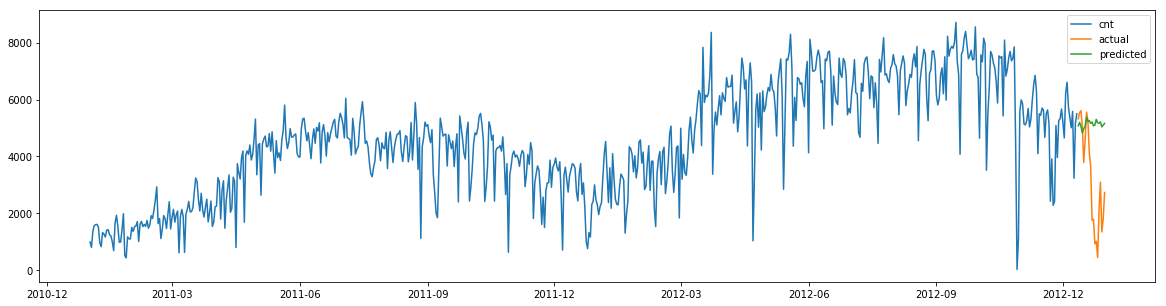

In [8]:
plt.figure(figsize=(20,5))
plt.plot(train)
plt.plot(test, label='actual')
plt.plot(predictions, label='predicted')
plt.legend()